In [1]:
# Make a neural network
require_relative 'lib/neural_network'

# SVG display of neural network in a Jupyter Notebook
require_relative 'lib/directed_draw'


true

In [2]:
# Make a new Multilayer Perceptron - MLP
#
# This MLP is minimalistic neural network. That is to say, it is a mathematical expression which
# takes several inputs as its data, and retruns a single output as its result.
# The MLP is created with a number of layers, each layers with a number of neurons. 

n = MLP.new(3, [4, 4, 1])

# The MLP initialised above has:
#   Data: 3 inputs
#   First layer: 4 neurons 
#   Second layer: 4 neurons 
#   Result: 1 output 


# The neurons are initialised with random weights, exercised with a forward pass, followed by a loss function, and the loss
# function tries to measure the accuracy of the predictions, pecitcion will be low when the network 
# is matching the predictions, or behaving well. We change the loss by changing the weights. 
# This is a process of figuring out the gradient of each neuron with respect to the MLP's loss. 
# Then we can nudge the weights in the direction of the gradient to reduce the loss. We do this over and over.
# This is called gradient decent. We `backward the loss`.
# // It's a blob of neural stuff. We can make it do anything. This is a tiny neural net with only 41 parameters
# // You can build with 100s of billions on parameters, and these networks have emergent properties


# Define inputs to the MLP as Floats
inputs = [2.0, 3.0, -1.0]
raise "Invalid input" if inputs.any? { |input| !input.is_a?(Float) }

# Call the MLP with the inputs.
n.call(inputs)
puts "# of params #{n.parameters.length}"

# of params 41


In [3]:
# training data
xs = [
  [2.0, 3.0, -1.0], # First - When we feed in this data...
  [3.0, -1.0, 0.5], # Second…
  [0.5, 1.0, 1.0],  # Third…
  [1.0, 1.0, -1.0]  # Fourth…
]

ys = [1.0, # First - we want this output
     -1.0, # Second…
     -1.0, # Third…
      1.0  # Fourth…
    ]

[1.0, -1.0, -1.0, 1.0]

In [4]:
# h is the amount by which we want to shift weights during gradient decent
h = -0.05

# we want to keep track of the loss and the y-prediction
loss = ypred = nil
xs.each do |x|
  raise "Invalid input" if x.any? { |input| !input.is_a?(Float) }
end

# epochs is the number of iterations we want to run in training. Each iteration we nudge the wieghts by h
epochs = 100
epochs.times do |index|
  # forward pass
  ypred = xs.map { |x| n.call(x) }  # run the training data through the randomly generated neural net
  
  loss = ys.zip(ypred).map {|ygt, yout| (yout - ygt)**2 }.sum # mean squared error loss
  # In the real world the loss function would not be a mean squared error, normall you would use 
  # binary cross entropy loss for predicting the next token, or max margin loss, or others.

  # backward pass
  n.parameters.each { |parameter| parameter.gradient = 0.0 } # zero the gradient before rerunning
  loss.backward # calculate all the gradients backwards from the loss (with respect to the loss)
  
  # update phase - step the gradient a small amount, h, which is set above
  # this is a simple stochastic gradient decent update
  n.parameters.each { |parameter| parameter.data += h * parameter.gradient }

  # Output the loss for each iteration, showing it slowing going down! It works! Tiny brain! Amazing :)
  puts "#{index}: #{loss.data} (#{n.parameters.length})"
end

# draw_dot(loss)
# puts ypred.map { |val| val.data } # and then inspect the first pass at getting the numbers out

puts ypred


0: 5.314918703672481 (41)
1: 2.868353795577561 (41)
2: 1.8630923555336665 (41)
3: 1.0742386790600567 (41)
4: 0.648281152874026 (41)
5: 0.366974354447527 (41)
6: 0.26554206164711064 (41)
7: 0.20713895362399454 (41)
8: 0.16806366189755362 (41)
9: 0.14043572168069818 (41)
10: 0.12004054480818246 (41)
11: 0.10445810263891742 (41)
12: 0.09221671769954756 (41)
13: 0.08237736047003248 (41)
14: 0.07431617343449329 (41)
15: 0.06760427174571035 (41)
16: 0.061938070117278615 (41)
17: 0.057097197199931046 (41)
18: 0.052918145893580674 (41)
19: 0.04927725018713244 (41)
20: 0.04607937948070687 (41)
21: 0.04325024419277869 (41)
22: 0.04073104376755039 (41)
23: 0.03847467059553078 (41)
24: 0.03644296976010234 (41)
25: 0.034604729224752384 (41)
26: 0.03293418428482269 (41)
27: 0.03140988991201875 (41)
28: 0.030013860151898008 (41)
29: 0.028730903990742275 (41)
30: 0.027548107559320384 (41)
31: 0.026454426583485194 (41)
32: 0.025440362774576054 (41)
33: 0.024497704760521728 (41)
34: 0.023619319097684718

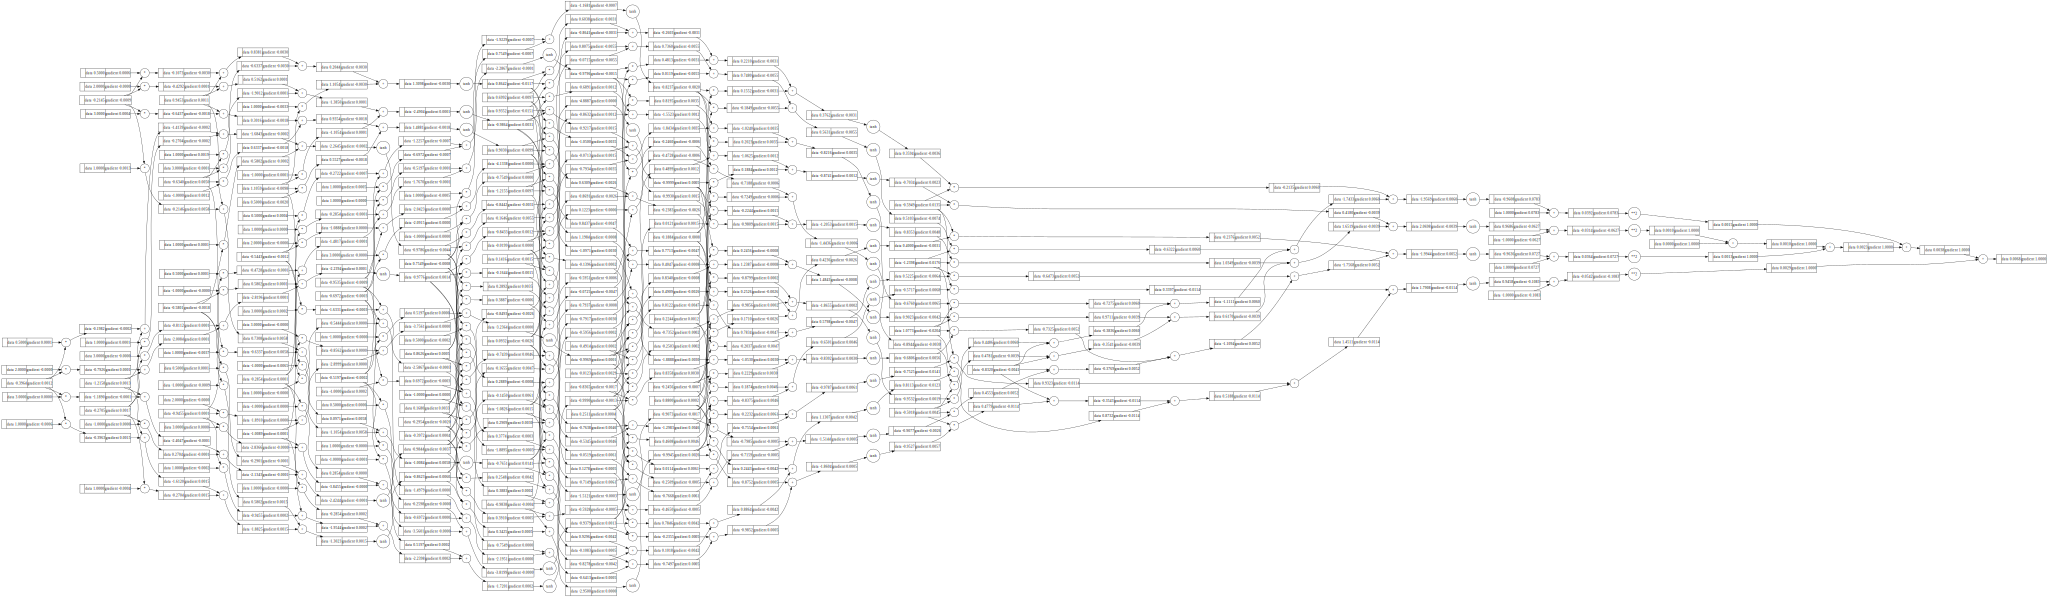

In [5]:
# visualise the final neural net MLP
DirectedDraw.draw_dot(loss)

In [9]:
require 'nyaplot'

plot1 = Nyaplot::Plot.new
plot1.add(:line, (-5...5).step(0.2).to_a, (-5...5).step(0.2).map {|num| Math.tanh(num) })
# A visualisation of what our nonlinearity function looks like - tanh
plot1.show

"if(window['d3'] === undefined ||\n   window['Nyaplot'] === undefined){\n    var path = {\"d3\":\"https://cdnjs.cloudflare.com/ajax/libs/d3/3.5.5/d3.min\",\"downloadable\":\"http://cdn.rawgit.com/domitry/d3-downloadable/master/d3-downloadable\"};\n\n\n\n    var shim = {\"d3\":{\"exports\":\"d3\"},\"downloadable\":{\"exports\":\"downloadable\"}};\n\n    require.config({paths: path, shim:shim});\n\n\nrequire(['d3'], function(d3){window['d3']=d3;console.log('finished loading d3');require(['downloadable'], function(downloadable){window['downloadable']=downloadable;console.log('finished loading downloadable');\n\n\tvar script = d3.select(\"head\")\n\t    .append(\"script\")\n\t    .attr(\"src\", \"http://cdn.rawgit.com/domitry/Nyaplotjs/master/release/nyaplot.js\")\n\t    .attr(\"async\", true);\n\n\tscript[0][0].onload = script[0][0].onreadystatechange = function(){\n\n\n\t    var event = document.createEvent(\"HTMLEvents\");\n\t    event.initEvent(\"load_nyaplot\",false,false);\n\t    win

#<Nyaplot::Frame:0x0000000112938e98 @properties={:panes=>[#<Nyaplot::Plot:0x000000011293dc18 @properties={:diagrams=>[#<Nyaplot::Diagram:0x0000000112939910 @properties={:type=>:line, :options=>{:x=>"data0", :y=>"data1"}, :data=>"78f42cb5-2e27-4d3b-af51-cafe6303167e"}, @xrange=[-5.0, 4.800000000000001], @yrange=[-0.9999092042625951, 0.9998645517007605]>], :options=>{:zoom=>true, :width=>700, :xrange=>[-5.0, 4.800000000000001], :yrange=>[-0.9999092042625951, 0.9998645517007605]}}>], :data=>{"78f42cb5-2e27-4d3b-af51-cafe6303167e"=>#<Nyaplot::DataFrame:0x000000011293d1c8 @name="78f42cb5-2e27-4d3b-af51-cafe6303167e", @rows=[{:data0=>-5.0, :data1=>-0.9999092042625951}, {:data0=>-4.8, :data1=>-0.9998645517007605}, {:data0=>-4.6, :data1=>-0.9997979416121845}, {:data0=>-4.4, :data1=>-0.9996985792838805}, {:data0=>-4.2, :data1=>-0.9995503664595334}, {:data0=>-4.0, :data1=>-0.999329299739067}, {:data0=>-3.8, :data1=>-0.9989995977858409}, {:data0=>-3.5999999999999996, :data1=>-0.9985079423323266}, {:data0=>-3.4, :data1=>-0.9977749279342794}, {:data0=>-3.2, :data1=>-0.9966823978396512}, {:data0=>-3.0, :data1=>-0.9950547536867305}, {:data0=>-2.8, :data1=>-0.992631520201128}, {:data0=>-2.5999999999999996, :data1=>-0.9890274022010992}, {:data0=>-2.4, :data1=>-0.9836748576936802}, {:data0=>-2.1999999999999997, :data1=>-0.9757431300314515}, {:data0=>-2.0, :data1=>-0.9640275800758169}, {:data0=>-1.7999999999999998, :data1=>-0.9468060128462683}, {:data0=>-1.5999999999999996, :data1=>-0.9216685544064712}, {:data0=>-1.4, :data1=>-0.8853516482022625}, {:data0=>-1.1999999999999997, :data1=>-0.8336546070121552}, {:data0=>-1.0, :data1=>-0.7615941559557649}, {:data0=>-0.7999999999999998, :data1=>-0.6640367702678489}, {:data0=>-0.5999999999999996, :data1=>-0.5370495669980351}, {:data0=>-0.39999999999999947, :data1=>-0.37994896225522445}, {:data0=>-0.1999999999999993, :data1=>-0.1973753202249033}, {:data0=>0.0, :data1=>0.0}, {:data0=>0.20000000000000018, :data1=>0.19737532022490417}, {:data0=>0.40000000000000036, :data1=>0.3799489622552252}, {:data0=>0.6000000000000005, :data1=>0.5370495669980356}, {:data0=>0.8000000000000007, :data1=>0.6640367702678494}, {:data0=>1.0, :data1=>0.7615941559557649}, {:data0=>1.2000000000000002, :data1=>0.8336546070121553}, {:data0=>1.4000000000000004, :data1=>0.8853516482022625}, {:data0=>1.6000000000000005, :data1=>0.9216685544064713}, {:data0=>1.8000000000000007, :data1=>0.9468060128462683}, {:data0=>2.0, :data1=>0.9640275800758169}, {:data0=>2.2, :data1=>0.9757431300314515}, {:data0=>2.4000000000000004, :data1=>0.9836748576936802}, {:data0=>2.6000000000000005, :data1=>0.9890274022010992}, {:data0=>2.8000000000000007, :data1=>0.992631520201128}, {:data0=>3.0, :data1=>0.9950547536867305}, {:data0=>3.200000000000001, :data1=>0.9966823978396512}, {:data0=>3.4000000000000004, :data1=>0.9977749279342794}, {:data0=>3.5999999999999996, :data1=>0.9985079423323266}, {:data0=>3.8000000000000007, :data1=>0.9989995977858409}, {:data0=>4.0, :data1=>0.999329299739067}, {:data0=>4.200000000000001, :data1=>0.9995503664595334}, {:data0=>4.4, :data1=>0.9996985792838805}, {:data0=>4.600000000000001, :data1=>0.9997979416121845}, {:data0=>4.800000000000001, :data1=>0.9998645517007605}]>}, :extension=>[]}>